# Определение стоимости автомобилей

Необходимо построить модель для определения стоимости автомобиля. Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Содержание:**

1. Подготовка данных
1-1.  Предобработка данных
1-2.  Разделение на выборки, преобразование признаков
2. Обучение моделей
3. Анализ моделей

In [1]:
import pandas as pd # импорт библиотеки pandas
from sklearn.preprocessing import LabelEncoder # импорт алгоритма LabelEncoder
from sklearn.metrics import mean_squared_error # импорт из библиотеки sklearn алгоритма mean_squared_error
from sklearn.model_selection import train_test_split # импорт алгоритма train_test_split
from sklearn.ensemble import GradientBoostingRegressor # импорт из библиотеки sklearn алгоритма Случайного Леса
from sklearn.dummy import DummyRegressor # импорт из библиотеки sklearn алгоритма DummyRegressor
from lightgbm import LGBMRegressor # импорт алгоритма LGBMRegressor
from xgboost import XGBRegressor # импорт алгоритма XGBRegressor
from catboost import CatBoostRegressor # импорт из библиотеки catboost алгоритма CatBoostRegressor

## 1 Подготовка данных

In [2]:
# знакомство с данными
df = pd.read_csv('***.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [4]:
df.duplicated().sum() # количесвто дубликатов

4

In [5]:
df[df.duplicated()] # строки с дубликатами

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


Признаки
 - DateCrawled — дата скачивания анкеты из базы
 - VehicleType — тип автомобильного кузова
 - RegistrationYear — год регистрации автомобиля
 - Gearbox — тип коробки передач
 - Power — мощность (л. с.)
 - Model — модель автомобиля
 - Kilometer — пробег (км)
 - RegistrationMonth — месяц регистрации автомобиля
 - FuelType — тип топлива
 - Brand — марка автомобиля
 - NotRepaired — была машина в ремонте или нет
 - DateCreated — дата создания анкеты
 - NumberOfPictures — количество фотографий автомобиля
 - PostalCode — почтовый индекс владельца анкеты (пользователя)
 - LastSeen — дата последней активности пользователя

Целевой признак
 - Price — цена (евро)

В данных есть пропуски, нарушение регистра. Так же есть 5 столбцов, которые не повлият на прогноз цены, их можно удалить. Количество фотографий везде равно 0. Найдены дубликаты, но дубликатами они не являются, просто похожие значения.

Присутствуют нулевые значения в цене, а так же 13 месяцев. Аномальные значения у года регистрации и мощности. Необходимо провести предобработку.

### 1.1 Предобработка данных

In [6]:
df = df.drop(columns=['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'])

In [7]:
# переименование столбцов
df = df.rename(columns = {'Price':'price',
                          'VehicleType':'vehicle_type',
                          'RegistrationYear':'registration_year',
                          'Gearbox':'gearbox',
                          'Power':'power',
                          'Model':'model',
                          'Kilometer':'km',
                          'RegistrationMonth':'registration_month',
                          'FuelType':'fuel',
                          'Brand':'brand',
                          'NotRepaired':'not_repaired'
                          })
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,km,registration_month,fuel,brand,not_repaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


In [8]:
df.isna().mean()*100 # пропуски в процентах 

price                  0.000000
vehicle_type          10.579368
registration_year      0.000000
gearbox                5.596709
power                  0.000000
model                  5.560588
km                     0.000000
registration_month     0.000000
fuel                   9.282697
brand                  0.000000
not_repaired          20.079070
dtype: float64

Так как главная задача проекта - построить модель, заполнение пропусков может ухудшить предсказания. Можно обработать один столбец (not_repaired - слишком много пропущенных значений).

Пропуски в 5 столбцах:
 - `тип кузова` - Невозможно восстановить, тип кузова может быть как минимум в двух вариантах. 10,6 %  
 - `тип коробки передач` - Невозможно восстановить, аналогично с типом кузова. 5.6 % 
 - `модель автомобиля` - Невозможно восстановить, аналогично с типом кузова. 5.6 % 
 - `тип топлива` - Можно взять за основу модель, брэнд, год выпуска, тип коробки передач. 9.3 % 
 - `была машина в ремонте или нет` - Можно заполнить, взять за основу пробег автомобиля. 20,1 % пропусков. 1/5 часть, их лучше заполнить. (это улучшает качество моделей, проверено)

In [9]:
# заполнение пропусков с ремонтами, 'yes' свыше 100 000 км пробега
df.loc[df['not_repaired'].isna(), 'not_repaired'] = df.loc[df['not_repaired'].isna(), 'km'] \
    .apply(lambda x: 'no' if x > 100000 else 'yes')

In [11]:
# замена пропусков 
df[['vehicle_type','gearbox','model','fuel']] = df[['vehicle_type','gearbox','model','fuel']].fillna('unknown')

In [12]:
df.isna().mean()*100 # пропуски в процентах 

price                 0.0
vehicle_type          0.0
registration_year     0.0
gearbox               0.0
power                 0.0
model                 0.0
km                    0.0
registration_month    0.0
fuel                  0.0
brand                 0.0
not_repaired          0.0
dtype: float64

Обработаем нулевые и аномальные значения мощности. \
Нулевую мощность можно заполнить медианой. (это улучшает качество моделей, проверено)

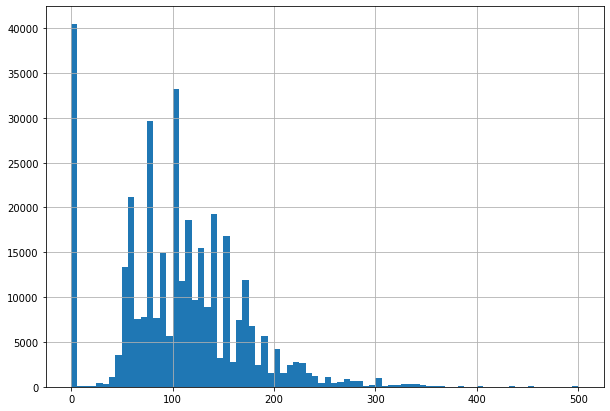

In [13]:
df['power'].hist(bins=80,range=(0,500),figsize=(10,7));

In [14]:
df.loc[df['power'] == 0, 'power'] = df['power'].median().astype('int64') # замена нулевой мощности медианой

Уберем аномалии в мощности. Больше 500 л.с. как правило в спортивных автомобилях. Конечно могут встречаться разные уникальные экземпляры. Но в наших данных это больше больше похоже на ошибку:

In [15]:
df.query('power > 500') 

,price,vehicle_type,registration_year,gearbox,power,model,km,registration_month,fuel,brand,not_repaired
1816,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no
2102,0,sedan,1999,unknown,1799,vectra,150000,1,petrol,opel,yes
3746,0,unknown,2017,manual,750,unknown,150000,8,petrol,smart,no
4060,3100,sedan,2005,manual,953,colt,150000,4,gasoline,mitsubishi,no
5328,500,wagon,1999,manual,1001,astra,150000,7,petrol,opel,no
...,...,...,...,...,...,...,...,...,...,...,...
348968,250,small,1999,manual,1241,ypsilon,150000,5,petrol,lancia,yes
351947,1500,bus,2001,manual,1001,zafira,5000,7,gasoline,opel,no
353493,12500,unknown,2017,manual,2000,other,60000,0,gasoline,chrysler,no
353633,2400,sedan,2007,manual,650,c2,150000,8,petrol,citroen,no


Похоже значения увеличены на 1 порядок. Но строк всего 459, проще удалить, чем гадать. Таких значений 0,1%.

In [16]:
df = df.query('power < 500') 

Обработаем нулевые значения цены.

In [17]:
df[df['price'] == 0]

,price,vehicle_type,registration_year,gearbox,power,model,km,registration_month,fuel,brand,not_repaired
7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no
40,0,unknown,1990,unknown,105,corsa,150000,1,petrol,opel,no
111,0,unknown,2017,manual,105,golf,5000,12,petrol,volkswagen,yes
115,0,small,1999,unknown,105,unknown,5000,0,petrol,volkswagen,yes
152,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes
...,...,...,...,...,...,...,...,...,...,...,...
354205,0,unknown,2000,manual,65,corsa,150000,0,unknown,opel,yes
354238,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,no
354248,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,no
354277,0,small,1999,manual,37,arosa,150000,7,petrol,seat,yes


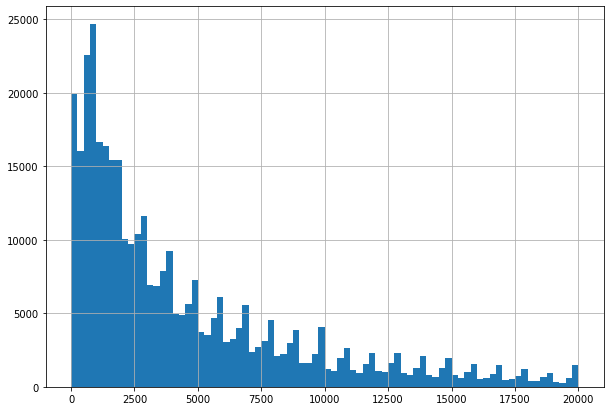

In [18]:
df['price'].hist(bins=80,figsize=(10,7));

Слишком разные машины присутствуют с нулевой стоимостью. Предсказать цену на них вряд ли предоставляется возможным. Лучше удалить.

In [19]:
df = df.query('price > 1')

Также присутствует нулевой месяц, скорей всего его не указали. Его можно оставить, не повлияет на результат.

In [20]:
df['registration_month'].value_counts()

3     33729
0     32309
6     30724
4     28606
5     28437
7     26589
10    25546
11    23696
12    23670
9     23300
1     22545
8     22065
2     20733
Name: registration_month, dtype: int64

In [21]:
#КОД РЕВЬЮЕРА

df.describe()

,price,registration_year,power,km,registration_month
count,341949.000000,341949.000000,341949.000000,341949.000000,341949.000000
mean,4569.743368,2004.068308,118.478007,128388.473135,5.786389
std,4512.536037,77.098381,50.620605,37418.944026,3.694397
min,2.000000,1000.000000,1.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,82.000000,125000.000000,3.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6500.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,490.000000,150000.000000,12.000000


Обработаем аномальные значения года регистрации.

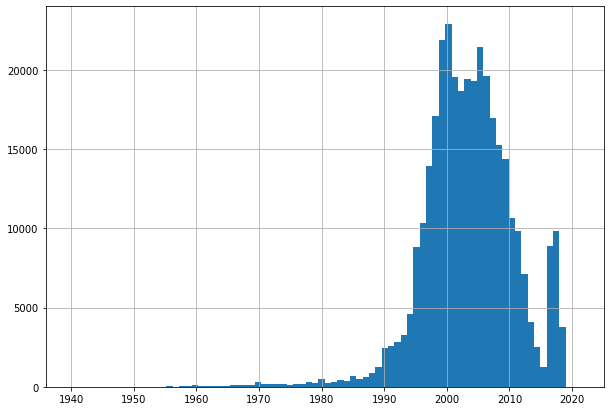

In [22]:
df['registration_year'].hist(bins=80,range=(1940,2021),figsize=(10,7));

Уберем аномальные значения года регистрации. Подавляющая масса приходится на 2000-е. Оставим значения с 1950 по 2020.

In [23]:
df = df.query('registration_year > 1950 & registration_year < 2020')

In [24]:
df.describe()

,price,registration_year,power,km,registration_month
count,341700.000000,341700.000000,341700.000000,341700.000000,341700.000000
mean,4569.490817,2003.221036,118.494802,128457.726076,5.789380
std,4511.460401,7.192458,50.623135,37318.892374,3.693234
min,2.000000,1951.000000,1.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,82.000000,125000.000000,3.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6500.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,2019.000000,490.000000,150000.000000,12.000000


### 1.2 Разделение на выборки, преобразование признаков.

In [25]:
features = df.drop(['price'], axis=1) # признаки
target = df['price'] # целевой признак

У нас 4 столбца с количесвтенными признаками: registration_year, power, km, registration_month.

И 6 столбцов с категориальными: vehicle_type, gearbox, model, fuel, brand, not_repaired. Преобразуем категориальные в количественные. Используем метод LabelEncoder(), чтобы не увеличивать объем данных, что повлечет увеличение времени обучения моделей.

In [26]:
# колонкам с категориальными признаками зададим параметр 'category'
features[['vehicle_type', 'gearbox', 'model', 'fuel', 'brand','not_repaired']] = \
    features[['vehicle_type', 'gearbox', 'model', 'fuel', 'brand','not_repaired']].astype('category')

In [27]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, train_size=0.6, random_state=42) # отделение 60% данных для обучающей выборки

In [28]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=42) 
# разделение оставшихся данных на тестовую и валидационную выборки

In [29]:
# создадим копии выборок для кодирования, чтоб потом применить на разных моделях
features_train_encoded, features_valid_encoded, features_test_encoded = \
    features_train.copy(), features_valid.copy(), features_test.copy() 

In [30]:
labelencoder = LabelEncoder()
for i in ['vehicle_type', 'gearbox', 'model', 'fuel', 'brand','not_repaired']:
    features_train_encoded[i] = labelencoder.fit_transform(features_train_encoded[i].values)
    features_valid_encoded[i] = labelencoder.fit_transform(features_valid_encoded[i].values)
    features_test_encoded[i] = labelencoder.fit_transform(features_test_encoded[i].values)

Проверим разделение выборок:

In [31]:
print('Обучающая выборка:',round(features_train.shape[0]/features.shape[0]*100,1),'%')
print('Валидационная выборка:',round(features_valid.shape[0]/features.shape[0]*100,1),'%')
print('Тестовая выборка:',round(features_test.shape[0]/features.shape[0]*100,1),'%')

Обучающая выборка: 60.0 %
Валидационная выборка: 20.0 %
Тестовая выборка: 20.0 %


**Вывод:**

- Обработали пропуски.
- Обработали аномалии и нулевые значения.
- Преобразовали категориальные признаки в количественные.
- Разделили выборки на обучающую, валидационную и тестовую.

## 2 Обучение моделей

Так как модели обучаются долго изменим всего несколько параметров. Параметры желательно поставить одинаковые, чтобы честно сравнить разные модели.

Используем 4 модели:

In [32]:
model_gbr = GradientBoostingRegressor(learning_rate=0.3, subsample=0.2, random_state=42) 
model_xgb = XGBRegressor(learning_rate=0.3, subsample=0.2, random_state=42)
model_lgbm = LGBMRegressor(learning_rate=0.3, subsample=0.2, random_state=42)
model_cb = CatBoostRegressor(learning_rate=0.3, subsample=0.2, random_state=42)

Измерим время обучения каждой модели:

**GradientBoostingRegressor**

In [33]:
%%time
model_gbr.fit(features_train_encoded, target_train)

CPU times: user 4.66 s, sys: 15.9 ms, total: 4.68 s
Wall time: 4.69 s


GradientBoostingRegressor(learning_rate=0.3, random_state=42, subsample=0.2)

**XGBRegressor**

In [34]:
%%time
model_xgb.fit(features_train_encoded, target_train)

CPU times: user 1min 27s, sys: 607 ms, total: 1min 27s
Wall time: 1min 28s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=None)

**LGBMRegressor**

In [35]:
%%time
model_lgbm.fit(features_train, target_train)

CPU times: user 3.68 s, sys: 56.2 ms, total: 3.73 s
Wall time: 3.76 s


LGBMRegressor(learning_rate=0.3, random_state=42, subsample=0.2)

**CatBoostRegressor**

In [36]:
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel', 'brand', 'registration_month', 'not_repaired']

In [37]:
%%time
model_cb.fit(features_train, target_train, cat_features = cat_features, verbose=1000)

0:	learn: 3678.4528220	total: 272ms	remaining: 4m 32s
999:	learn: 1503.9816842	total: 2m 17s	remaining: 0us
CPU times: user 2min 19s, sys: 765 ms, total: 2min 19s
Wall time: 2min 21s


Измерим время предсказаний:

In [38]:
%%time
prediction_gbr = model_gbr.predict(features_valid_encoded)

CPU times: user 76.2 ms, sys: 11 µs, total: 76.2 ms
Wall time: 77.7 ms


In [39]:
%%time
prediction_xgb = model_xgb.predict(features_valid_encoded)

CPU times: user 215 ms, sys: 3.55 ms, total: 219 ms
Wall time: 171 ms


In [40]:
%%time
prediction_lgbm = model_lgbm.predict(features_valid)

CPU times: user 467 ms, sys: 11.1 ms, total: 479 ms
Wall time: 501 ms


In [41]:
%%time
prediction_cb = model_cb.predict(features_valid)

CPU times: user 807 ms, sys: 11.8 ms, total: 819 ms
Wall time: 888 ms


Найдем для каждой модели RMSE:

In [42]:
print('Лучшая RMSE GradientBoostingRegressor на валидационной выборке:', mean_squared_error(target_valid, prediction_gbr)**0.5)
print('Лучшая RMSE XGBRegressor на валидационной выборке:', mean_squared_error(target_valid, prediction_xgb)**0.5)
print('Лучшая RMSE LightGBM на валидационной выборке:', mean_squared_error(target_valid, prediction_lgbm)**0.5)
print('Лучшая RMSE CatBoost на валидационной выборке:', mean_squared_error(target_valid, prediction_cb)**0.5)

Лучшая RMSE GradientBoostingRegressor на валидационной выборке: 1924.5857895415145
Лучшая RMSE XGBRegressor на валидационной выборке: 1832.2117905100126
Лучшая RMSE LightGBM на валидационной выборке: 1647.4296216783373
Лучшая RMSE CatBoost на валидационной выборке: 1630.17748930442


Проверим качество на тестовой выборке:

In [43]:
prediction_gbr = model_gbr.predict(features_test_encoded)
prediction_xgb = model_xgb.predict(features_test_encoded)
prediction_lgbm = model_lgbm.predict(features_test)
prediction_cb = model_cb.predict(features_test)

In [44]:
print('Лучшая RMSE GradientBoostingRegressor на тестовой выборке:', mean_squared_error(target_test, prediction_gbr)**0.5)
print('Лучшая RMSE XGBRegressor на тестовой выборке:', mean_squared_error(target_test, prediction_xgb)**0.5)
print('Лучшая RMSE LightGBM на тестовой выборке:', mean_squared_error(target_test, prediction_lgbm)**0.5)
print('Лучшая RMSE CatBoost на тестовой выборке:', mean_squared_error(target_test, prediction_cb)**0.5)

Лучшая RMSE GradientBoostingRegressor на тестовой выборке: 1919.8790489549192
Лучшая RMSE XGBRegressor на тестовой выборке: 1816.7502216061155
Лучшая RMSE LightGBM на тестовой выборке: 1649.5239375207839
Лучшая RMSE CatBoost на тестовой выборке: 1639.7048535410704


**Проверка модели на адекватность:**

In [45]:
# вызов константной модели
dummy = DummyRegressor(strategy="mean")
# обучение модели
dummy.fit(features_train,target_train)

DummyRegressor()

In [46]:
# предсказания модели
prediction_dummy = dummy.predict(features_test)
print('RMSE константной модели на тестовой выборке:', mean_squared_error(target_test, prediction_dummy)**0.5)

RMSE константной модели на тестовой выборке: 4512.3866225107895


Все модели прошли проверку на адекватность, качество предсказаний намного выше предсказаний константной модели.

**Вывод:**

 - Обучили 4 модели с изменением нескольких параметров.
 - Замерили время обучения и предсказания.
 - Проверили модели на адекватность константной моделью.

## 3 Анализ моделей

Выберем лучшую модель по трем признакам:
 - качество предсказания;
 - скорость предсказания;
 - время обучения.

In [49]:
# создадим таблицу для удобства сравнения
data = {'learning_time':['4.69 s', '1min 28s', '3.76 s', '2min 21s',],
        'prediction_time':['77.7 ms', '171 ms', '501 ms', '888 ms'],
        'rmse_valid':['1924.6', '1832.2', '1647.4', '1630.2']}
index = ['GradientBoostingRegressor', 'XGBRegressor', 'LightGBM', 'CatBoost']
pd.DataFrame(data = data, index = index)

,learning_time,prediction_time,rmse_valid
GradientBoostingRegressor,4.69 s,77.7 ms,1924.6
XGBRegressor,1min 28s,171 ms,1832.2
LightGBM,3.76 s,501 ms,1647.4
CatBoost,2min 21s,888 ms,1630.2


Так как у нас небольшой объем данных, скорость предсказания у всех моделей занимает милисекунды. Можно было бы не обращать на это внимание, но если наш датасет будет занимать миллионы строк, время конечно же увеличится.

- Лучшая скорость предсказания и отличное время обучения у GradientBoostingRegressor, но качество предсказания худшее из 4 моделей.
- Лучшее качество предсказания у CatBoost, но худшая скорость предсказания и время обучения.
- У LightGBM лучшая скорость обучения.
- XGBRegressor показал среднюю скорость обучения и качетва предсказания.

Нужно найти баланс между тремя признаками.

- CatBoost выигрывает по предсказаниям, GradientBoostingRegressor по скорости в целом.
- LightGBM немного уступает по качеству предсказания CatBoost, но серьезно выигрывает в скорости обучения.

Получается лучшая модель по трем признакам - это LightGBM.

**Вывод:**

- Проанализировано 4 модели на основе градиентного бустинга.
- У каждой модели есть свои плюсы и минусы (при почти базовых параметрах):

     1. GradientBoostingRegressor \
         `+` самая быстрая по скорости предсказаний и отличная по времени обучения \
         `-` худшее качество 
     2. XGBRegressor \
         `+` относительно хорошая скорость предсказаний \
         `-` относительно долгое время обучения и среднее качество предсказания 
     3. LightGBM \
         `+` хорошее качество предсказания и лучшее время обучения\
         `-` среднее время предсказаний
     4. CatBoost \
         `+` лучшее качество предсказания \
         `-` самое долгое время обучения и предсказания 
         
         
- Лучшая модель по трем признакам: **LightGBM**.